<a href="https://colab.research.google.com/github/GAETANNGALEU23/CC-machinelearning/blob/main/Copy_of_ControleContinueProjet3deMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
#importation des differents bibliotheques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [21]:
#Chargement de nos donnees d'entrainement
A = pd.read_csv('train.csv', delimiter=",")
B = pd.read_csv('test.csv', delimiter=",")

In [43]:
#Affichage de nos donnees d'entrainement
print("affchage de nos donnees entrainement avant petraitement:\n",A )

affchage de nos donnees entrainement avant petraitement:
         Id  MSSubClass  MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60         3         65.0     8450   Pave   NaN      Reg   
1        2          20         3         80.0     9600   Pave   NaN      Reg   
2        3          60         3         68.0    11250   Pave   NaN      IR1   
3        4          70         3         60.0     9550   Pave   NaN      IR1   
4        5          60         3         84.0    14260   Pave   NaN      IR1   
...    ...         ...       ...          ...      ...    ...   ...      ...   
1455  1456          60         3         62.0     7917   Pave   NaN      Reg   
1456  1457          20         3         85.0    13175   Pave   NaN      Reg   
1457  1458          70         3         66.0     9042   Pave   NaN      Reg   
1458  1459          20         3         68.0     9717   Pave   NaN      Reg   
1459  1460          20         3         75.0     9937   Pave 

In [41]:
#Normaliser la variable MSZoning
#A['MSZoning'] = A.str.strip().str.capitalize()
label_encoder = LabelEncoder()
A['MSZoning'] = label_encoder.fit_transform(A['MSZoning'])


In [42]:
A

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_nouveau
0,1,60,3,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,3
1,2,20,3,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,3
2,3,60,3,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,3
3,4,70,3,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,3
4,5,60,3,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,3
1456,1457,20,3,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,3
1457,1458,70,3,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,3
1458,1459,20,3,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,3


In [9]:
#Normaliser lq variable Fences
A['Fence'] = A['Fence'].str.strip().str.capitalize()
A['Fence'] = A['Fence'].replace({'MnPrv':'MNPRV', 'GdPrv':'GDPRV', 'NaN':'NAN'})

In [7]:
#Traiter les valeurs aberrantes
A['SalePrice'] = pd.to_numeric(A['SalePrice'], errors='coerce')
A['SalePrice'] = A['SalePrice'].clip(lower=0)
A['SalePrice'] = A['SalePrice'].fillna(A['SalePrice'].median())


In [10]:
#Detecter les valeurs manquantes
A['MiscVal'] = A['MiscVal'].fillna('vide')
A['Donnees Manquantes'] = A['MiscVal'] == 'vide'

In [51]:
A

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_nouveau
0,1,60,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,3
1,2,20,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,3
2,3,60,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,3
3,4,70,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,3
4,5,60,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,3
1456,1457,20,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,3
1457,1458,70,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,3
1458,1459,20,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,3


In [12]:
#Supprimer les lignes ou les MSSubClass sont vides
A = A.dropna(subset=['MSSubClass'])

In [13]:
#Affichage des donnees apres traitement
print("\nAffichage des donnees apres traitement:\n", A)


Affichage des donnees apres traitement:
         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     Land

In [14]:
#Affichage des colonnes de nos donnees d'entrainement
A.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
#Affichage du type de Donnees de nos donnees d'entrainement

print( "le type de variable:\n", A.dtypes)


le type de variable:
 Id                      int64
MSSubClass              int64
MSZoning               object
LotFrontage           float64
LotArea                 int64
                       ...   
YrSold                  int64
SaleType               object
SaleCondition          object
SalePrice               int64
Donnees Manquantes       bool
Length: 82, dtype: object


In [61]:
#correlation entre les variables et le prix de ve

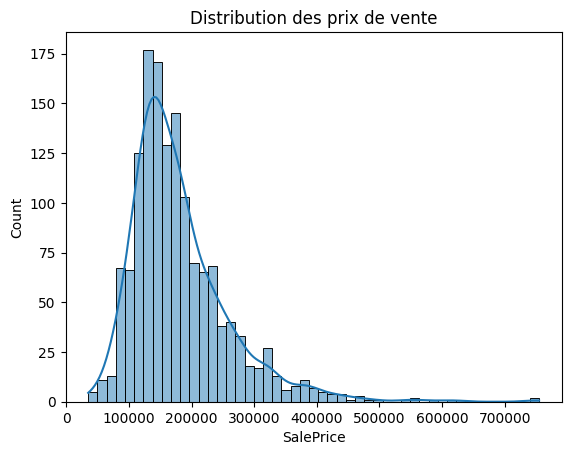

In [62]:
#distribution des prix de vente
sn.histplot(A['SalePrice'], kde=True)
plt.title("Distribution des prix de vente")
plt.show()


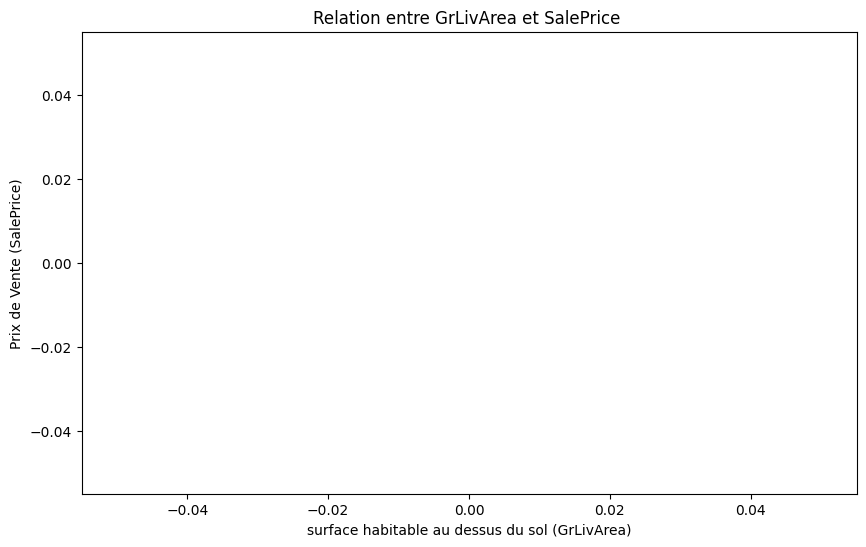

In [80]:
plt.figure(figsize=(10, 6))
sn.scatterplot(data = A, x='Id', alpha=0.7, color='blue')

plt.title("Relation entre GrLivArea et SalePrice ")
plt.xlabel("surface habitable au dessus du sol (GrLivArea)")
plt.ylabel("Prix de Vente (SalePrice)")
plt.show()


<Axes: xlabel='SalePrice', ylabel='count'>

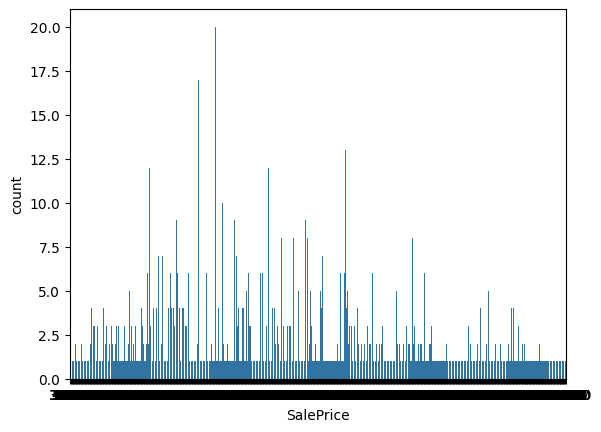

In [17]:
sn.countplot(A, x="SalePrice")

<Axes: xlabel='Id', ylabel='count'>

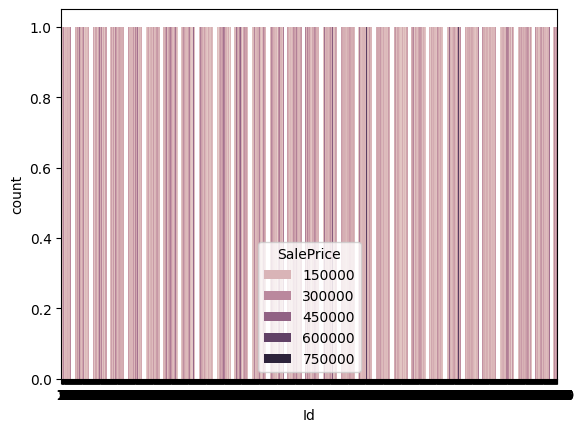

In [18]:
sn.countplot(A, x="Id", hue="SalePrice")

In [63]:
#Alignement des colonnes
A, B = A.align(B, join='inner', axis=1)

In [22]:
#preparation des donnees pour le modele
X = A.drop(['SalePrice'], axis=1)
y = A['SalePrice']



In [23]:
#donnees en ensemble d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
#initialisation du modele
model = LinearRegression()


In [ ]:
#Predire sur le jeu de test
model_xgb = model.fit(X_train, y_train)
predictions = model_xgb.predict(A)
submission = pd.DataFrame({'Id': X_test['Id'], 'SalePrice': predictions})
submission.to_csv('submission.csv', index=False)
